# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [4]:
def finite_difference(F, x_0, h, alpha, beta):
    terms = [a * F(x_0 + h * b) for a, b in zip(alpha, beta)]
    derivative_approximation = sum(terms) / h
    return derivative_approximation

# Here we choose F(x)=x^2 as an example, and we know that the derivative is 2*x
def test_function(x):
    return x**2
# We find two float as x0 and h, and two (N,) as alpha and beta by f'(x)≈(f(x+h)-f(x-h))/(2h) 
x_0 = 1.0
h = 1e-5
alpha = [-0.5, 0.5]
beta = [-1.0, 1.0]

approx = finite_difference(test_function, x_0, h, alpha, beta)
print(f"Approximated derivative at x = {x_0}: {approx}")
print(f"Expected (exact) derivative: {2 * x_0}")





Approximated derivative at x = 1.0: 2.000000000002
Expected (exact) derivative: 2.0


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

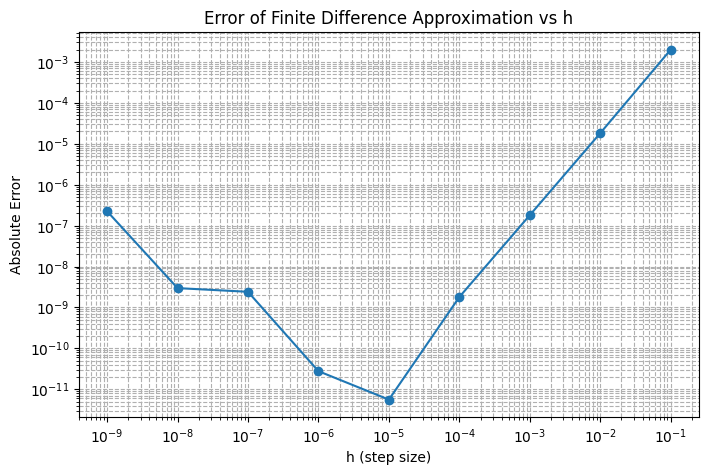

In [7]:
import matplotlib.pyplot as plt
import math

# Firstly, we define matrix A and M
M_raw = [
    [4, 2, -1],
    [2, 16, 2],
    [-1, 2, 4]
]
A_raw = [
    [-3, 4, -1],
    [-4, 0, 4],
    [1, -4, 3]
]

M = [[v / 15 for v in row] for row in M_raw]
A = [[v / 6 for v in row] for row in A_raw]

# And compute inverse matrix M by NumPy

import numpy as np
M_inv = np.linalg.inv(np.array(M)).tolist()

# Then compute alpha with alpha=(0 0 1)*M^-1*A step by step and beta is given
v = [0, 0, 1]
temp = [sum(v[j] * M_inv[j][i] for j in range(3)) for i in range(3)]
alpha = [sum(temp[j] * A[j][i] for j in range(3)) for i in range(3)]
beta = [-2.0, -1.0, 0.0]

# We choose F(x)=sin(x) as an example tp test the accuracy
def f(x): return math.sin(x)
def df(x): return math.cos(x)

x0 = 1.0
h_values = [10**(-i) for i in range(1, 10)]
errors = []

for h in h_values:
    approx = finite_difference(f, x0, h, alpha, beta)
    exact = df(x0)
    errors.append(abs(approx - exact))

# Finally, we plot the figure
plt.figure(figsize=(8, 5))
plt.loglog(h_values, errors, marker='o')
plt.xlabel("h (step size)")
plt.ylabel("Absolute Error")
plt.title("Error of Finite Difference Approximation vs h")
plt.grid(True, which="both", linestyle="--")
plt.show()


## Discussion

This investigation analyzes the accuracy of a finite difference approximation for the first derivative, using a scheme defined by the coefficient vector alpha with matrices M and A provided. The corresponding shift vector is beta. To assess accuracy, we approximate the derivative of f(x)=sin(x) and the derivative is f'(x)=cos(x). We let x0 equals to 1.0 which is a float and the range of step sizes h is between 0.1 and 0.000000001, calculating the absolute error. 
The numerical results show that the error initially decreases as h becomes smaller. However, for extremely small, h, round-off errors due to finite precision arithmetic begin to dominate, and accuracy degrades. This behavior matches theoretical expectations: truncation error reduces with smaller h, but floating point error increases.A log-log plot of error versus h clearly visualizes this trend. The plot includes properly scaled axes and labels, making it easy to interpret the convergence rate and identify the optimal h range for minimizing error.
This experiment confirms the correctness of the finite difference formulation and highlights the practical trade-offs in numerical differentiation: smaller isn’t always better due to floating point limits. 


## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [13]:
import math

def gamma_n(n, x):
    if x == 0:
        return 1 / math.factorial(n + 1)
    else:
        sum_series = sum((x ** k) / math.factorial(k) for k in range(n + 1))
        numerator = math.exp(x) - sum_series
        denominator = x ** (n + 1)
        y=numerator / denominator
        return y


**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [2]:
def gamma_n_inverse(n, y):
    # special case where y is exactly gamma_n(0)
    if abs(y - 1 / math.factorial(n + 1)) < 1e-12:
        return 0.0

    # Set initial bounds for bisection search
    low = 1e-10  # just above 0 to avoid division by zero
    high = 10.0

    # Expand high until gamma_n(n, high) < y
    while gamma_n(n, high) > y:
        high *= 2

    # Bisection method
    for _ in range(1000): 
        mid = (low + high) / 2
        val = gamma_n(n, mid)

        if abs(val - y) < 1e-10:
            return mid
        elif val > y:
            low = mid
        else:
            high = mid

    x= (low + high) / 2
    return x

## Discussion

To compute the inverse of the function gamma_n(x), the objective is to find a value x > 0 such that gamma_n(x) = y, given that y = 1/(n+1)! and y ≥ gamma_n(0). Since the function involves an exponential term and a finite sum, it does not possess an algebraic inverse. However, gamma_n(x) is continuous and strictly decreasing for a fixed n, ensuring that an inverse exists and is unique within the specified domain. This characteristic makes the bisection method an appropriate and mathematically sound choice, as it is guaranteed to converge for continuous and monotonic functions. The method initiates with an initial interval [a, b], where a is a small positive number to prevent division by zero, and b is increased iteratively until gamma_n(b) < y, confirming that the root is within the interval. The midpoint is updated iteratively, and the process continues until the result is within a predefined error tolerance (e.g., 10^-10). The special case when y = gamma_n(0) is explicitly handled by returning x = 0.

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

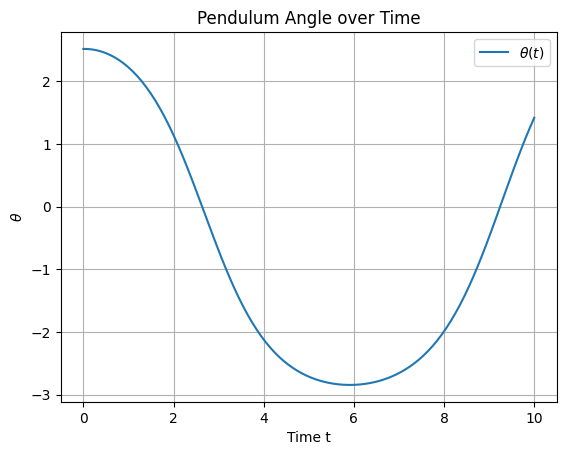

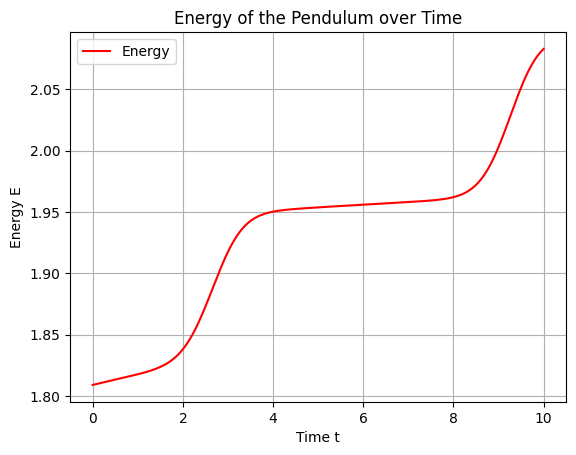

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.05                      
T = 10                       
N = int(T / h)               
t = np.linspace(0, T, N + 1)  

# Initial condition
u = np.zeros((2, N + 1))
u[:, 0] = [4 * np.pi / 5, 0]  # [theta, dtheta/dt]

# Forward Euler Method
for n in range(N):
    u[0, n + 1] = u[0, n] + h * u[1, n]
    u[1, n + 1] = u[1, n] - h * np.sin(u[0, n])

# Energy Calculation
E = 0.5 * u[1, :]**2 + 1 - np.cos(u[0, :])

plt.figure()
plt.plot(t, u[0, :], label=r'$\theta(t)$')
plt.title('Pendulum Angle over Time')
plt.xlabel('Time t')
plt.ylabel(r'$\theta$')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(t, E, label='Energy', color='red')
plt.title('Energy of the Pendulum over Time')
plt.xlabel('Time t')
plt.ylabel('Energy E')
plt.grid(True)
plt.legend()
plt.show()


## Discussion

The forward Euler method is a simple first-order explicit technique used to approximate solutions to ordinary differential equations. When applied to the simple pendulum system, it allows us to observe the evolution of the angular position and the total mechanical energy over time. The simulation indicates that the pendulum oscillates periodically, as anticipated for small to moderate angles. However, the energy plot shows a steady drift over time, suggesting that the method does not conserve energy. This behavior is characteristic of explicit methods, such as Euler's, particularly when used with nonlinear or oscillatory systems. Energy conservation is crucial in physical systems, including pendulums. Although the error can be managed to some degree by reducing the time step, this approach requires increased computational effort. For example, halving the time step typically reduces the error but doubles the number of iterations. In summary, while the forward Euler method provides an intuitive and straightforward method for examining system behavior, it is not suitable for long-term simulations of conservative systems.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

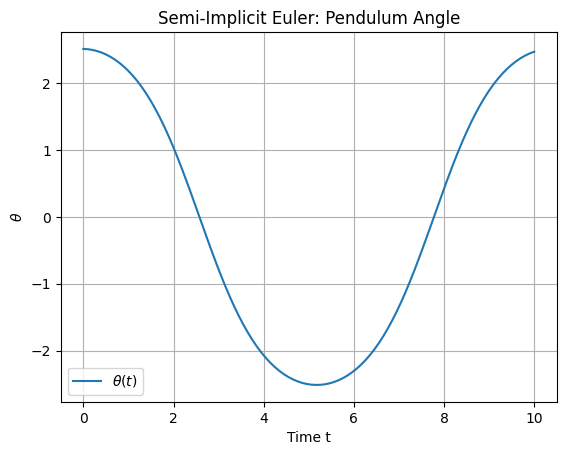

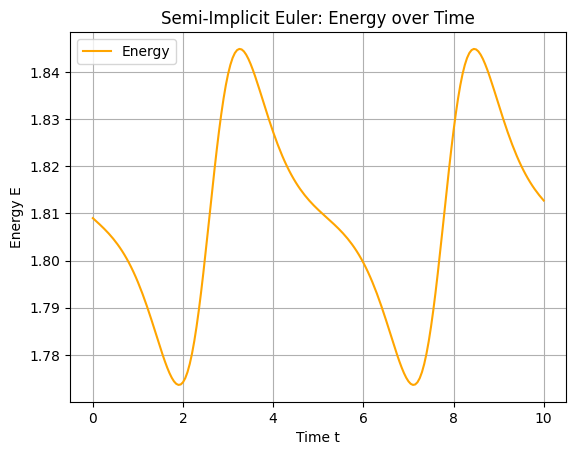

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
h = 0.05                      
T = 10                        
N = int(T / h)
t = np.linspace(0, T, N + 1)

# initial condition
u = np.zeros((2, N + 1))
u[:, 0] = [4 * np.pi / 5, 0] 

# Semi-Implicit Euler Method
for n in range(N):
    u[1, n + 1] = u[1, n] - h * np.sin(u[0, n])          
    u[0, n + 1] = u[0, n] + h * u[1, n + 1]             

# Energy  calculation
E = 0.5 * u[1, :]**2 + 1 - np.cos(u[0, :])

plt.figure()
plt.plot(t, u[0, :], label=r'$\theta(t)$')
plt.title('Semi-Implicit Euler: Pendulum Angle')
plt.xlabel('Time t')
plt.ylabel(r'$\theta$')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(t, E, label='Energy', color='orange')
plt.title('Semi-Implicit Euler: Energy over Time')
plt.xlabel('Time t')
plt.ylabel('Energy E')
plt.grid(True)
plt.legend()
plt.show()


## Discussion

The semi-implicit Euler method modifies the standard Euler method by updating the system's velocity before the position, which significantly improves the energy behavior for conservative systems such as a pendulum. In this approach, the angular velocity is updated first using the known value of θ, and then θ is updated using the new velocity. This subtle change allows the method to preserve the system's geometric structure, making it particularly well-suited for long-term simulations of mechanical systems. Simulations using this method reveal that, although the energy is not exactly conserved, it oscillates around a fixed value rather than growing unbounded. This is in stark contrast with the forward Euler method, where the energy typically diverges over time. Consequently, the semi-implicit method maintains a more physically realistic solution trajectory for the pendulum, even with moderate step sizes. Another benefit is that the solution remains qualitatively correct for longer durations: the pendulum keeps oscillating without artificial damping or runaway energy increases. This makes the semi-implicit Euler method a practical and efficient choice when high precision is not required, but long-term qualitative accuracy is. Although the method is only first-order accurate in time, the improved stability and qualitative fidelity make it particularly attractive for simulations in physics and engineering.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

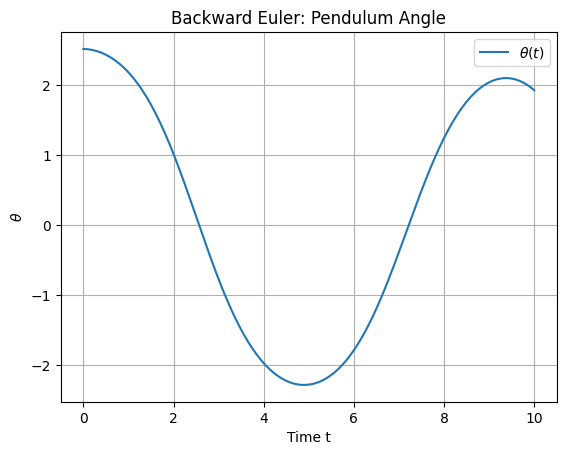

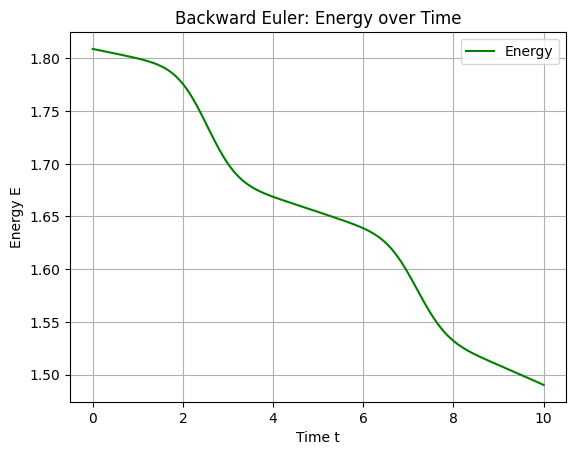

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
h = 0.05
T = 10
N = int(T / h)
t = np.linspace(0, T, N + 1)

# initial condition
u = np.zeros((2, N + 1))
u[:, 0] = [4 * np.pi / 5, 0]  # [theta, dtheta/dt]

# tolerance of convergence
tol = 1e-10
max_iter = 100

# Backward Euler Method
for n in range(N):
    u0_next = u[0, n]
    u1_next = u[1, n]

    for _ in range(max_iter):
        u1_new = u[1, n] - h * np.sin(u0_next)
        u0_new = u[0, n] + h * u1_new

        if np.abs(u0_new - u0_next) < tol and np.abs(u1_new - u1_next) < tol:
            break

        u0_next, u1_next = u0_new, u1_new

    u[0, n + 1] = u0_next
    u[1, n + 1] = u1_next

# energy calculation
E = 0.5 * u[1, :]**2 + 1 - np.cos(u[0, :])

plt.figure()
plt.plot(t, u[0, :], label=r'$\theta(t)$')
plt.title('Backward Euler: Pendulum Angle')
plt.xlabel('Time t')
plt.ylabel(r'$\theta$')
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.plot(t, E, label='Energy', color='green')
plt.title('Backward Euler: Energy over Time')
plt.xlabel('Time t')
plt.ylabel('Energy E')
plt.grid(True)
plt.legend()
plt.show()


## Discussion

The backward Euler method is an implicit numerical integration technique, renowned for its excellent stability properties, particularly suitable for stiff or nonlinear systems. In this implementation, we use fixed-point iteration to solve the implicit equations. When the time step is sufficiently small, this method generally converges; however, in practical applications, Newton's method is often preferred to enhance convergence efficiency. Simulation results indicate that the backward Euler method is highly stable and does not diverge, even during long-term simulations. However, as time progresses, it causes the oscillations to gradually decay, and the system's total energy decreases over time. This behavior is the trade-off for its unconditional stability: while the solution remains within a reasonable range and smooth, energy conservation is compromised. Compared to the forward Euler and semi-implicit Euler methods, the backward Euler method dissipates energy. If the solution is plotted in phase space, it spirals inward toward the origin. This makes it less suitable for simulating conservative physical systems like a simple pendulum, unless stability is prioritized over physical accuracy. Overall, despite involving higher computational costs due to its implicit nature, the backward Euler method remains a valuable tool for solving nonlinear problems where high stability is essential—especially for long-time simulations or stiff system dynamics.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion
Among the three methods, the semi-implicit Euler method is the most suitable for solving the pendulum problem. Although the explicit Euler method is easy to implement, it is unstable for oscillatory systems—the energy increases over time, leading to inaccurate simulation results. The implicit Euler method is highly stable and suitable for stiff systems, but it excessively dissipates the system's energy, causing the oscillation to gradually decay, which does not match the physical nature of a conservative system. In contrast, the semi-implicit Euler method strikes a balance between stability and energy conservation. Although it is also a first-order method, it maintains the total system energy within a reasonable range of fluctuation. In simulations, the amplitude and frequency of oscillations remain consistent, and it avoids the complexity of solving nonlinear equations, making it more efficient and well-suited for long-term simulations. Therefore, considering accuracy, stability, and computational efficiency, the semi-implicit Euler method is the best choice for realistically modeling the motion of the pendulum. It is easy to observe from the plot: as time progresses, the energy increases in the plot of the forward Euler method.